<a href="https://colab.research.google.com/github/craigalexander/DAS23/blob/main/DAS_Week_7_Lab_(Solutions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Skills - Confidence Intervals and Model Parameter Selection



# Introduction

In this lab we construct confidence intervals for the parameters in simple and multiple linear regression models. We consider confidence intervals based on theoretical results when standard assumptions hold. We will also consider how to use confidence intervals for variable selection and finish by considering a model selection strategy based on objective measures for model comparisons.

For this lab, we will use the following libraries in Python:

In [32]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

Let's continue with the teaching evaluations data that we first saw in Lab 6 by fitting the multiple regression with one numerical and one categorical predictor. In this model:

* $y$: outcome variable of instructor evaluation `score`
* predictor variables
    + $x_1$: numerical explanatory/predictor variable of `age`
    + $x_2$: categorical explanatory/predictor variable of `gender`



In [ ]:
evals_url = 'https://github.com/craigalexander/DAS23/raw/main/Data/evals.csv'
evals = pd.read_csv(evals_url,index_col=0) 

evals_score = evals[["score","age","gender"]]
# We will need to convert gender to a category
evals_score['gender'] = evals_score.gender.astype('category')
evals_score.dtypes # Print data types

First, recall that we had two competing potential models to explain professors' teaching evaluation scores in Lab 6:

1. Model 1: Parallel lines model (no interaction term) - both male and female professors have the same slope describing the associated effect of age on teaching score
2. Model 2: Interaction model - allowing for male and female professors to have different slopes describing the associated effect of age on teaching score.

Let's recall the regression models we fit. First, the regression with no 
interaction effect: note the use of `+` in the formula.

In [9]:
model_parallel = ols("score~ age + gender",data=evals_score)
result_parallel=model_parallel.fit() # Fit model

print(result_parallel.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     9.338
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           0.000106
Time:                        12:57:06   Log-Likelihood:                -365.26
No. Observations:                 463   AIC:                             736.5
Df Residuals:                     460   BIC:                             748.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4841      0.125     35.

Second, the regression with an interaction effect: note the use of `*` in the formula.

In [10]:
model_interaction = ols("score~ age*gender",data=evals_score)
result_interaction=model_interaction.fit() # Fit model

print(result_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     8.288
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           2.23e-05
Time:                        12:58:20   Log-Likelihood:                -362.26
No. Observations:                 463   AIC:                             732.5
Df Residuals:                     459   BIC:                             749.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8830      0

Notice that, together with the estimated parameter values, the tables include other information about each estimated parameter in the model, namely:

Notice that, together with the estimated parameter values, the tables include other information about each estimated parameter in the model, namely:

* **std err**: the standard error of each parameter estimate
* **t**: the test statistic value used to test the null hypothesis that the population parameter is zero
* **P >|t|**: the $p$ value associated with the test statistic under the null hypothesis
* **[0.025** and **0.975]**: the lower and upper bounds of the 95% confidence interval for the population parameter

These values are calculated using the theoretical results based on the standard assumptions that you will have seen in *Regression Modelling* in first semester.

**Question**

What is the 95% Confidence Interval for the difference, on average, between the (linear) effect age has on the evaluation scores of male professors and the (linear) effect age has on the evaluation scores of female professors?

**Answer**

(0.003, 0.024)

**Question**

By just considering the simpler parallel lines model, what can we say about the the difference, on average, between the evaluation scores of male and female professors when age is taken into account?

**Answer**

It's highly likely that, on average, male professors' scores are between 0.1 and 0.3 units higher than females professors' scores when age is taken into account

# Inference using Confidence Intervals

# Simple Linear Regression: $E(y_i) = \alpha + \beta x_i$ 

As we have seen, 

> A confidence interval gives a range of plausible values for a population parameter.

We can therefore use the confidence interval for $\beta$ to state a range of plausible values and, just as usefully, what values are **not** plausible.  The most common values to compare the confidence interval of $\beta$ with is 0 (zero), since $\beta = 0$ says there is *no* (linear) relationship between the outcome variable ($y$) and the explanatory variable ($x$).  Therefore, if 0 lies within the confidence interval for $\beta$ then there is insufficient evidence of a linear relationship between $y$ and $x$.  However, if 0 does **not** lie within the confidence interval, then we conclude that $\beta$ is significantly different from zero and therefore that there is evidence of a linear relationship between $y$ and $x$.

Let's use the confidence interval based on theoretical results for slope parameter in the SLR model applied to the teacher evaluation scores with `age` as the the single explanatory variable and the instructors' evaluation `score`s as the outcome variable. 

In [11]:
model_simple = ols('score~age',data=evals_score)
result_simple = model_simple.fit()

print(result_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.342
Date:                Sun, 19 Feb 2023   Prob (F-statistic):             0.0213
Time:                        13:06:19   Log-Likelihood:                -371.81
No. Observations:                 463   AIC:                             747.6
Df Residuals:                     461   BIC:                             755.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4619      0.127     35.195      0.0

**Question**

Based on the fitted SLR model, is there evidence that there is a statistically significant linear relationship between the age of the professors and their teaching evaluation score?

**Answer**

Yes

# Multiple Regression $E(y_i) = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ...$

Consider, again, the fitted interaction model for `score` with `age` and `gender` as the two explanatory variables.

In [13]:
print(result_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     8.288
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           2.23e-05
Time:                        13:10:49   Log-Likelihood:                -362.26
No. Observations:                 463   AIC:                             732.5
Df Residuals:                     459   BIC:                             749.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8830      0

**Question**

Based on the fitted interaction model, is there evidence that we should allow for different rates of change for male and female professors' teaching scores as they get older?

**Answer**

Yes

# Variable Selection using Confidence Intervals

When there is more than one explanatory variable in a model, the parameter associated with each explanatory variable is interpreted as the change in the mean response based on a 1-unit change in the corresponding explanatory variable **keeping all other variables held constant**.  Therefore, care must be taken when interpreting the confidence intervals of each parameter by acknowledging that each are plausible values **conditional on all the other explanatory variables in the model**.

Because of the interdependence between the parameter estimates and the variables included in the model, choosing which variables to include in the model is a rather complex task.  We will introduce some of the ideas in the simple case where we have 2 potential explanatory variables ($x_1$ and $x_2$)  and use confidence intervals to decide which variables will be useful in predicting the outcome variable ($y$).

One approach is to consider a hierarchy of models:

$$\hat y_i = \alpha + \beta_1 x_{1i} + \beta_2 x_{2i}$$   
$$\hat y_i = \alpha + \beta_1 x_{1i} \qquad \qquad \qquad \hat y_i = \alpha + \beta_2 x_{2i}$$   
$$\hat y_i = \alpha$$

Within this structure we might take a top-down approach:

1. Fit the most general model, i.e. $\hat y_i = \alpha + \beta_1 x_{1i} + \beta_2 x_{2i}$ since we believe this is likely to provide a good description of the data.
2. Construct confidence intervals for $\beta_1$ and $\beta_2$

    (a) If both intervals exclude 0 then retain the model with both $x_1$ and $x_2$.

    (b) If the interval for $\beta_1$ contains 0 but that for $\beta_2$ does not, fit the model with $x_2$ alone.

    (c) If the interval for $\beta_2$ contains 0 but that for $\beta_1$ does not, fit the model with $x_1$ alone.
    
    (d) If both intervals include 0 it may still be that a model with one variable is useful. In this case the two models with the single variables should be fitted and intervals for $\beta_1$ and $\beta_2$ constructed and compared with 0.

If we have only a few explanatory variables, then an extension of the strategy outlined above would be effective, i.e. start with the full model and simplify by removing terms until no further terms can be removed.  When the number of explanatory variables is large the problem becomes more difficult. We will consider this more challenging situation in the next section.

Recall that as well as `age` and `gender`, there is also a potential explanatory variable `bty_avg` in the `evals` data, i.e. the numerical variable of the average beauty score from a panel of six students' scores between 1 and 10. We can fit the multiple regression model with the two continuous explanatory variables `age` and `bty_avg` as follows:

In [18]:
model_mlr = ols('score ~ age + bty_avg',data=evals)
result_mlr = model_mlr.fit()
print(result_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.031
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           0.000142
Time:                        13:15:50   Log-Likelihood:                -365.56
No. Observations:                 463   AIC:                             737.1
Df Residuals:                     460   BIC:                             749.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0547      0.170     23.870      0.0

**Question**

Following the process outlined above for choosing which variables to include in the model, what would be your next step after fitting this MLR model

**Answer**

Fit a SLR model with `bty_avg`

# Model comparisons using objective criteria

As was noted in the last section, when the number of potential predictor variables is large the problem of selecting which variables to include in the final model becomes more difficult.  The selection of a final regression model always involves a compromise:

* Predictive accuracy (improved by including more predictors)
* Parsimony and interpretability (achieved by having less predictors)


There are many objective criteria for comparing different models applied to the same data set. All of them trade off the two objectives above, i.e.  fit to the data against complexity. Common examples include:

1.  The $R^2_{adj}$ values, i.e. the proportions of total variation of response variable explained by the models.

$$R_{adj}^2 = 1 - \frac{RSS/(n-p-1)}{SST/(n-1)} = 100 \times \Bigg[ 1-\frac{\sum_{i=1}^n(y_i-\hat y_i)^2/(n-p-1)}{\sum_{i=1}^n(y_i-\bar y_i)^2/(n-1)}\Bigg]$$

  * where 
      - $n$ is the sample size
      - $p$ is the number of parameters in the model
      - $RSS$ is the residual sum of squares from the fitted model
      - $SST$ is the total sum of squares around the mean response.
  * F ratios and the F-distribution can be used to compare the $R_{adj}^2$ values
  * These can only be used for nested models, i.e. where one model is a particular case of the other

2. Akaike's Information Criteria (AIC) 

$$AIC = -2(\mbox{log-likeihood})+2p = n\mbox{ln}\Bigg(\frac{RSS}{n}\Bigg)+2p$$

  * A value based on the maximum likelihood function of the parameters in the fitted model penalized by the number of parameters in the model
  * Can be used to compare any models fitted to the same response variable 
  * The smaller the AIC the 'better' the model, i.e. no distributional results are employed to assess differences 

3. Bayesian Information Criteria 

$$BIC = -2(\mbox{log-likeihood})+\mbox{ln}(n)p$$
A popular data analysis strategy which we shall adopt is to calculate $R_{adj}^2$, $AIC$ and $BIC$ and prefer the models which **minimize** $AIC$ and $BIC$ and that **maximize** $R_{adj}^2$.

To illustrate, let's return to the `evals` data and the MLR on the teaching evaluation score `score` with the two continuous explanatory variables `age` and `bty_avg` and compare this with the SLR model with just `bty_avg`.  

To access these measures for model comparisons we can view these values in the `summary` output from our `ols` object, or can access these individually as follows (**Note - there are slight differences between the objective criteria values when compared to R. This is due to a difference in the fitting process for `ols` when compared to `lm`**):

In [26]:
# Fit SLR for bty_avg
model_simple2 = ols('score~bty_avg',data=evals)
result_simple2 = model_simple2.fit()

# Obtain objective criteria for SLR for age
print(result_simple.rsquared_adj) # R2 value
print(result_simple.aic) # AIC value
print(result_simple.bic) # BIC value

# Obtain objective criteria for SLR for bty_avg
print(result_simple2.rsquared_adj) # R2 value
print(result_simple2.aic) # AIC value
print(result_simple2.bic) # BIC value

# Obtain objective criteria for MLR for age and bty_avg
print(result_mlr.rsquared_adj) # R2 value
print(result_mlr.aic) # AIC value
print(result_mlr.bic) # BIC value

0.00931149520785346
747.6163026279014
755.8917567360738
0.03292903378612022
736.44490898058
744.7203630887524
0.033597442612292805
737.1193581246387
749.5325392868974


**Question**

Based on these values and the model comparison strategy outlined above, which of these three models would you favour?

**Answer**

The SLR model with `bty_avg`

# A final word on model selection

A great deal of care should be taken in selecting predictors for a model because the values of the regression coefficients depend upon the variables in the model. Therefore, the predictors included and the order in which they are entered into the model can have a great impact. In an ideal world, predictors should be selected based on past research and new predictors should be added to existing models based on the theoretical importance of the variables.  One thing not to do is select hundreds of random predictors, bung them all into a regression analysis and hope for the best. 

But in practice there are automatic strategies, such as *Stepwise* and *Best Subsets* regression, based on systematically searching through the entire list of variables not in the current model to make decisions on whether each should be included. These strategies need to be handled with care, and a proper discussion of them is beyond this course. Our best strategy is a mixture of judgement on what variables should be included as potential explanatory variables, together with parameter interval estimation and a comparison of objective measures for assessing different models. The judgement should be made in the light of advice from the problem context.

**Golden rule for modelling**

> The key to modelling data is to only use the objective measures as a rough guide. In the end the choice of model will involve your own judgement. You have to be able to defend why you chose a particular model.

# Further Tasks: Model Parameter Selection

**Question 1**

Data were collected on the characteristics of homes in the American city of Los Angeles (LA) in 2010 and can be found in the file `LAhomes.csv` on the Moodle page.  The data contain the following variables:

* `city` - the district of LA where the house was located
* `type` - either `SFR` (Single Family Residences) or `Condo/Twh` (Condominium/Town House)
* `bed` - the number of bedrooms
* `bath` - the number of bathrooms
* `garage` - the number of car spaces in the garage
* `sqft` - the floor area of the house (in square feet)
* `pool` - `Y` if the house has a pool
* `spa` - `TRUE` if the house has a spa
* `price` - the most recent sales price ($US)

We are interested in exploring the relationships betwen `price` and the other variables.

Read the data into an object called `LAhomes` and answer the following questions.


a. By looking at the univariate and bivariate distributions on the `price` and `sqft` variables below, what would be a sensible way to proceed if we wanted to model this data?  What care must be taken if you were to proceed this way?

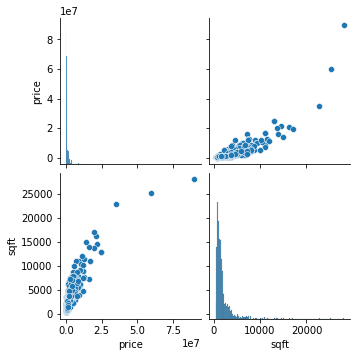

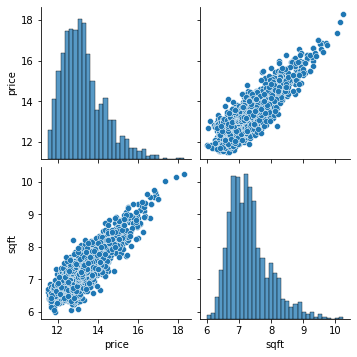

In [46]:
# Read data
LAhomes_url = 'https://github.com/craigalexander/DAS23/raw/main/Data/LAhomes.csv'
LAhomes = pd.read_csv(LAhomes_url,index_col=0) 

homes = LAhomes[["price","sqft"]]

sns.pairplot(homes)

# Let's take a look at the log values
log_homes = np.log(homes) # transform data to natural logarithm
pt=sns.pairplot(log_homes)




b.  Fit the simple linear model with `log(price)` as the response and `log(sqft)` as the predictor. Display the fitted model on a scatterplot of the data.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     5446.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:21:18   Log-Likelihood:                -1143.1
No. Observations:                1594   AIC:                             2290.
Df Residuals:                    1592   BIC:                             2301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7028      0.144     18.809      0.0

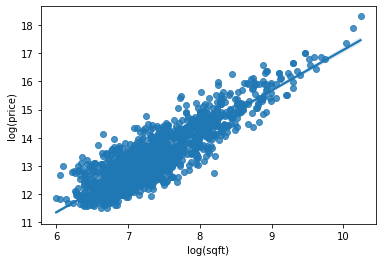

In [49]:
model_log1 = ols("price ~ sqft",data=log_homes)
result_log1 = model_log1.fit()
print(result_log1.summary())

sp=sns.regplot(data = log_homes, x = 'sqft', y = 'price', fit_reg = True)
sp.set(xlabel='log(sqft)',ylabel='log(price)')
plt.show()

c. Repeat the analysis in part b. but with the log of the number of bathrooms (`bath`) as the single explanatory variable.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     2172.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          9.66e-300
Time:                        14:25:33   Log-Likelihood:                -1641.9
No. Observations:                1594   AIC:                             3288.
Df Residuals:                    1592   BIC:                             3299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2310      0.028    437.232      0.0

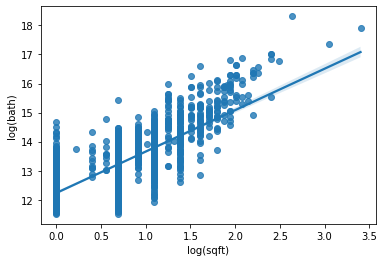

In [52]:
log_homes2 = np.log(LAhomes[["price","bath"]])

model_log2 = ols("price ~ bath",data=log_homes2)
result_log2 = model_log2.fit()
print(result_log2.summary())

sp=sns.regplot(data = log_homes2, x = 'bath', y = 'price', fit_reg = True)
sp.set(xlabel='log(sqft)',ylabel='log(bath)')
plt.show()

d. Fit the multiple linear regression model using the **log transform of all the variables** `price` (as the response) and both `sqft` and `bath` (as the explanatory variables). Calculate the point and interval estimates of the coefficients of the two predictors separately. Compare their point and interval estimates to those you calculated in parts b. and c.   Can you account for the differences?

In [53]:
log_homes3 = np.log(LAhomes[["price","bath","sqft"]])

model_log3 = ols("price ~ bath + sqft",data=log_homes3)
result_log3 = model_log3.fit()
print(result_log3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2723.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:27:36   Log-Likelihood:                -1142.7
No. Observations:                1594   AIC:                             2291.
Df Residuals:                    1591   BIC:                             2308.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5141      0.262      9.601      0.0

e. Using the objective measures for model comparisons, which of the models in parts b., c. and d. would you favour?  Is this consistent with your conclusions in part d.?

In [54]:
# Obtain objective criteria for SLR for sqft
print(result_log1.rsquared_adj) # R2 value
print(result_log1.aic) # AIC value
print(result_log1.bic) # BIC value

# Obtain objective criteria for SLR for bath
print(result_log2.rsquared_adj) # R2 value
print(result_log2.aic) # AIC value
print(result_log2.bic) # BIC value

# Obtain objective criteria for MLR for sqft and bath
print(result_log3.rsquared_adj) # R2 value
print(result_log3.aic) # AIC value
print(result_log3.bic) # BIC value

0.7736417711921657
2290.1553203002145
2300.9033240189146
0.5767366456980425
3287.801257427488
3298.549261146188
0.7736052700750143
2291.4107672052146
2307.532772783265


**Question 2**

You have been asked to determine the pricing of a New York City (NYC) Italian restaurant's dinner menu such that it is competitively positioned with other high-end Italian restaurants by analyzing pricing data that have been collected in order to produce a regression model to predict the price of dinner.

Data from surveys of customers of 168 Italian restaurants in the target area are available. The data can be found in the file `restNYC.csv` on the Moodle page.  Each row represents one customer survey from Italian restaurants in NYC and includes the key variables:

* `Price` - price (in $US) of dinner (including a tip and one drink)
* `Food` - customer rating of the food (from 1 to 30)
* `Decor` - customer rating fo the decor (from 1 to 30)
* `Service` - customer rating of the service (from 1 to 30)
* `East` - dummy variable with the value 1 if the restaurant is east of Fifth Avenue, 0 otherwise


a. Produce an informative set of graphical and numerical summaries which illuminate the relationships between pairs of variables.  Where do you see the strongest evidence of relationships between `price` and the potential explanatory variables?  Is there evidence of multicollineatity in the data?

,Restaurant,Price,Food,Decor,Service,East
1,Daniella Ristorante,43,22,18,20,female
2,Tello's Ristorante,32,20,19,19,female
3,Biricchino,34,21,13,18,female
4,Bottino,41,20,20,17,female
5,Da Umberto,54,24,19,21,male
...,...,...,...,...,...,...
164,Baci,31,17,15,16,male
165,Puccini,26,20,16,17,male
166,Bella Luna,31,18,16,17,male
167,Mtisse,38,22,17,21,male


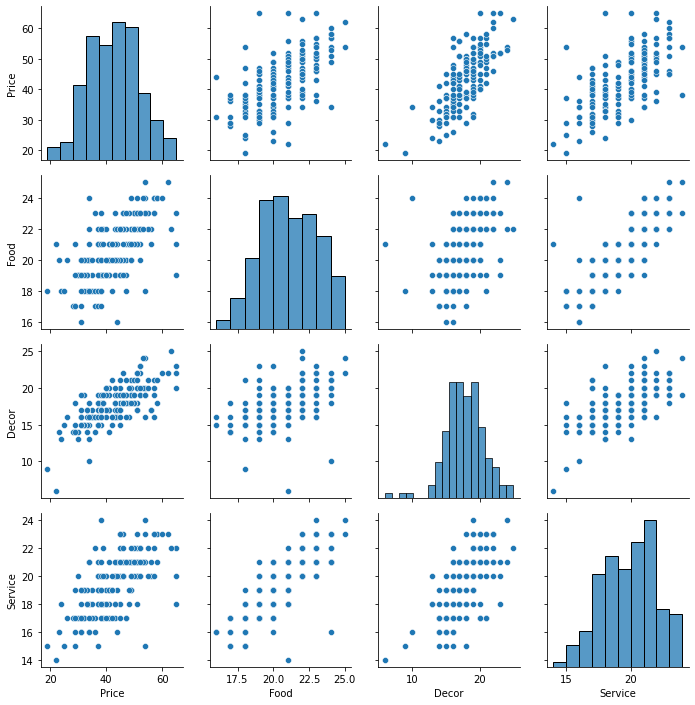

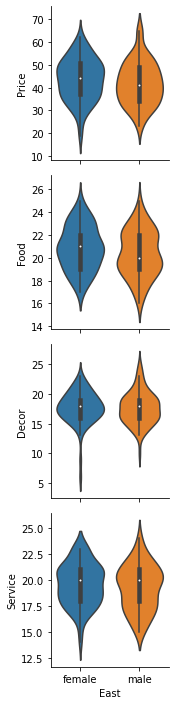

In [70]:
restNYC_url = 'https://github.com/craigalexander/DAS23/raw/main/Data/restNYC.csv'
restNYC = pd.read_csv(restNYC_url,index_col=0,encoding = 'unicode_escape') 
restNYC['East'] = evals_score.gender.astype('category')
restNYC=restNYC.drop('Case',axis=1)

g = sns.PairGrid(restNYC)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# Relationship with East
cat_vars = ['East']
num_vars = ['Price', 'Food','Decor','Service']
g2 = sns.PairGrid(data=restNYC, x_vars=cat_vars, y_vars=num_vars)
g2.map(sns.violinplot)

restNYC

b. Fit the simple linear model with `Price` as the response and `Service` as the predictor and  display the fitted model on a scatterplot of the data.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           7.88e-21
Time:                        14:49:48   Log-Likelihood:                -567.92
No. Observations:                 168   AIC:                             1140.
Df Residuals:                     166   BIC:                             1146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.9778      5.109     -2.344      0.0

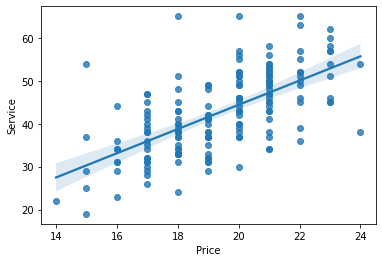

In [72]:
model1 = ols("Price ~ Service",data=restNYC)
result1 = model1.fit()
print(result1.summary())

sp=sns.regplot(data = restNYC, x = 'Service', y = 'Price', fit_reg = True)
sp.set(xlabel='Price',ylabel='Service')
plt.show()

Now fit a multiple regressing model of `Price` on `Service`, `Food`, and `Decor`.  What happens to the significance of `Service` when additional variables were added to the model?

In [73]:
model2 = ols("Price ~ Service + Food + Decor",data=restNYC)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     88.06
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           5.39e-34
Time:                        14:50:44   Log-Likelihood:                -531.78
No. Observations:                 168   AIC:                             1072.
Df Residuals:                     164   BIC:                             1084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.6409      4.754     -5.184      0.0

c. What is the correct interpretation of the coefficient on `Service` in the linear model which regresses `Price` on `Service`, `Food`, and `Decor`?

**Answer**

When `Food` and `Decor` are in the model, `Service` is not statistically significant, therefore we cannot know
whether it has a significant effect on modeling `Price`.